<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Model-parameterisation" data-toc-modified-id="Model-parameterisation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model parameterisation</a></span></li><li><span><a href="#Bernoulli-trial" data-toc-modified-id="Bernoulli-trial-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bernoulli trial</a></span></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Conjugate-priors-vs.-approximate-inferences" data-toc-modified-id="Conjugate-priors-vs.-approximate-inferences-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conjugate priors vs. approximate inferences</a></span></li><li><span><a href="#Where-is-the-valuable-piece-of-the-story?" data-toc-modified-id="Where-is-the-valuable-piece-of-the-story?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Where is the valuable piece of the story?</a></span></li><li><span><a href="#Set-up" data-toc-modified-id="Set-up-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Set-up</a></span></li><li><span><a href="#Runnuning-Bayesian-inference---updating-prior-in-a-loop" data-toc-modified-id="Runnuning-Bayesian-inference---updating-prior-in-a-loop-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Runnuning Bayesian inference - updating prior in a loop</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Bayesian inference for a coin toss

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 8, 8
rcParams['font.size'] = 20

# Model parameterisation
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- Firstly, we need to consider the concept of parameters and models. 
- A parameter could be the weighting of an unfair coin, which we could label as $θ$. 
- Thus $θ = P(H)$ would describe the probability distribution of our beliefs that the coin will come up as heads when flipped. The model is the actual means of encoding this flip mathematically. 
- In this instance, the coin flip can be modelled as a Bernoulli trial.

</font>
</div>

# Bernoulli trial
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- A Bernoulli trial is a random experiment with only two outcomes, usually labelled as "success" or "failure", in which the probability of the success is exactly the same every time the trial is carried out. 

- The probability of the success is given by $θ$, which is a number between 0 and 1. Thus $θ ∈ [0, 1]$.

- Over the course of carrying out some coin flip experiments (**repeated Bernoulli trials**) we will generate some data, D, about heads or tails.

</font>
</div>

# Bayesian inference
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- **First question** "What is the probability of seeing 3 heads in 8 flips (8 Bernoulli trials), given a fair coin (θ = 0.5)?". This is expressed as $P(D|θ)$ and is called **likelihood**. This is the probability of seeing the data D as generated by a model with parameter θ. If we knew the coin was fair, this tells us the probability of seeing a number of heads in a particular number of flips.
    
- **However, what we are really interested is the alternative question** - "What is the probability that the coin is fair (or unfair), given that I have seen a particular sequence of heads and tails?". Thus we are interested in the probability distribution which *reflects our belief* about different possible values of $θ$, given that we have observed some data D. This expressed as $P(θ|D)$ and called the **posterior**. This is the (refined) strength of our belief of θ once the evidence D has been taken into account. After seeing 4 heads out of 8 flips, say, this is our updated view on the fairness of the coin. Notice that this is the converse of P(D|θ). 
    
- **How do we get between these two probabilities?** It turns out that Bayes’ rule is the link that allows us to go between the two situations: $P(θ|D) = P(D|θ) P(θ) / P(D)$

- P(D) is the evidence. This is the probability of the data as determined by summing (or integrating) across all possible values of θ, weighted by how strongly we believe in those particular values of θ. If we had multiple views of what the fairness of the coin is (but didn’t know for sure), then this tells us the probability of seeing a certain sequence of flips for all possibilities of our belief in the coin’s fairness.
</font>
</div>

# Conjugate priors vs. approximate inferences
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- There are two approaches to Bayesian statistical inference:
    - **Conjugate priors** facilitate the updating process by providing a closed-form solution that allows us to precisely compute the solution. However, such exact, analytical methods are not always available.
    - **Approximate inference** simulates the distribution that results from combining assumptions and data and uses samples from this distribution to compute statistical insights.
    
</font>
</div>

# Where is the valuable piece of the story?
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- What makes it such a valuable technique is that posterior beliefs **can themselves** be used as prior beliefs under the generation of new data. 

- Hence Bayesian inference allows us to continually adjust our beliefs under new data by repeatedly applying Bayes’ rule.

</font>
</div>

# Set-up
<hr style = "border:2px solid black" ></hr>

In [2]:
# Create a list of the number of coin tosses ("Bernoulli trials") 
number_of_trials = [0, 2, 10, 20, 50, 500]

# Conduct 500 coin tosses and output into a list of 0s and 1s 
# where 0 represents a tail and 1 represents a head
data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])

# Discretise the x-axis into 100 separate plotting points
x = np.linspace(0, 1, 100)

# Runnuning Bayesian inference - updating prior in a loop
<hr style = "border:2px solid black" ></hr>

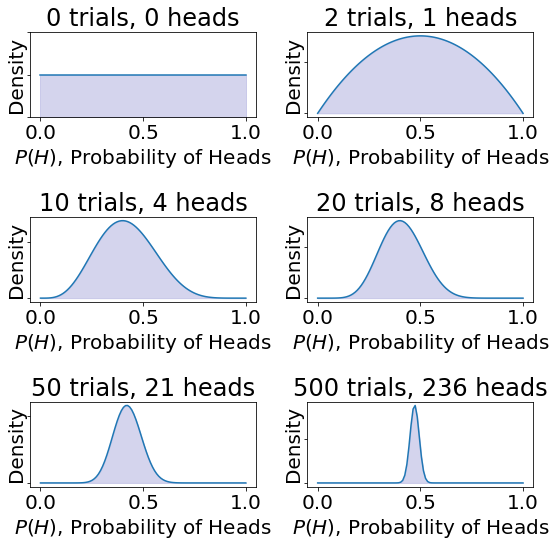

In [3]:
# Loops over the number_of_trials list to continually add
# more coin toss data. For each new set of data, we update
# our (current) prior belief to be a new posterior. This is
# carried out using what is known as the Beta-Binomial model. 
# For the time being, we won’t worry about this too much.

for i, N in enumerate(number_of_trials):
    # Accumulate the total number of heads for this 
    # particular Bayesian update
    heads = data[:N].sum()
    
    # Create an axes subplot for each update
    ax = plt.subplot(int(len(number_of_trials) / 2), 2, i + 1) 
    ax.set_title("%s trials, %s heads" % (N, heads))
    
    # Add labels to both axes and hide labels on y-axis
    plt.xlabel("$P(H)$, Probability of Heads") 
    plt.ylabel("Density")
    if i == 0:
        plt.ylim([0.0, 2.0]) 
    
    plt.setp(ax.get_yticklabels(), visible=False)
    # Create and plot a  Beta distribution to represent the
    
    # posterior belief in fairness of the coin.
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads)) 
    plt.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)

plt.tight_layout()
plt.show()

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://www.quantstart.com/advanced-algorithmic-trading-ebook/ 

</font>
</div>